In [1]:
import pandas as pd

In [4]:
diabetes = pd.read_csv('02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [7]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
import tensorflow as tf

In [11]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [12]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [14]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

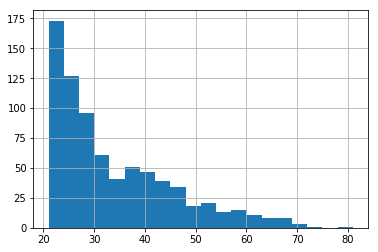

In [17]:
diabetes['Age'].hist(bins=20)

In [18]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [48]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [49]:
# TRAIN TEST SPLIT

In [50]:
x_data = diabetes.drop('Class',axis=1)

In [51]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [52]:
labels = diabetes['Class']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [55]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [56]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_num_ps_replicas': 0, '_device_fn': None, '_master': '', '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_task_id': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/tmp/tmpow3jpy2p', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6ab43f5f98>, '_num_worker_replicas': 1, '_is_chief': True}


In [57]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpow3jpy2p/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 234.074
INFO:tensorflow:loss = 5.978318, step = 101 (0.428 sec)
INFO:tensorflow:global_step/sec: 522.258
INFO:tensorflow:loss = 7.2619243, step = 201 (0.192 sec)
INFO:tensorflow:global_step/sec: 541.586
INFO:tensorflow:loss = 5.926523, step = 301 (0.184 sec)
INFO:tensorflow:global_step/sec: 549.648
INFO:tensorflow:loss = 4.667178, step = 401 (0.182 sec)
INFO:tensorflow:global_step/sec: 566.666
INFO:tensorflow:loss = 6.584164, step = 501 (0.177 sec)
INFO:tensorflow:global_step/sec: 568.833
INFO:tensorflow:loss = 6.4460754, step = 601 (0.176 sec)
INFO:tensorflow:global_step/sec: 569.071
INFO:tensorflow:loss 

In [58]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [59]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-07-00:09:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpow3jpy2p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-07-00:09:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.79699594, auc_precision_recall = 0.6407285, average_loss = 0.53006554, global_step = 1000, label/mean = 0.35064936, loss = 5.1018806, precision = 0.66101694, prediction/mean = 0.35263726, recall = 0.4814815
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpow3jpy2p/model.ckpt-1000


In [60]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79699594,
 'auc_precision_recall': 0.6407285,
 'average_loss': 0.53006554,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1018806,
 'precision': 0.66101694,
 'prediction/mean': 0.35263726,
 'recall': 0.4814815}

In [61]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [62]:
predictions = model.predict(pred_input_func)

In [63]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpow3jpy2p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4992967], dtype=float32),
  'logits': array([-0.00281334], dtype=float32),
  'probabilities': array([0.50070333, 0.49929667], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.59226197], dtype=float32),
  'logits': array([0.37332428], dtype=float32),
  'probabilities': array([0.40773797, 0.59226197], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35105836], dtype=float32),
  'logits': array([-0.61439025], dtype=float32),
  'probabilities': array([0.64894164, 0.3510584 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32302845], dtype=float32),
  'logits': array([-0.73988885], dtype=float32),
  'probabilities': array([0.67697155, 0.32302845], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtyp

In [65]:
dnn_mode = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_num_ps_replicas': 0, '_device_fn': None, '_master': '', '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_task_id': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/tmp/tmp3p968lvx', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6a5009cf60>, '_num_worker_replicas': 1, '_is_chief': True}


In [66]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [67]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [68]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [75]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_num_ps_replicas': 0, '_device_fn': None, '_master': '', '_save_checkpoints_steps': None, '_global_id_in_cluster': 0, '_tf_random_seed': None, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_task_type': 'worker', '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_task_id': 0, '_evaluation_master': '', '_save_checkpoints_secs': 600, '_session_config': None, '_model_dir': '/tmp/tmpvfc7aj38', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6ab4691c88>, '_num_worker_replicas': 1, '_is_chief': True}


In [76]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpvfc7aj38/model.ckpt.
INFO:tensorflow:loss = 6.979822, step = 1
INFO:tensorflow:global_step/sec: 156.64
INFO:tensorflow:loss = 3.2119603, step = 101 (0.641 sec)
INFO:tensorflow:global_step/sec: 239.471
INFO:tensorflow:loss = 4.0519576, step = 201 (0.418 sec)
INFO:tensorflow:global_step/sec: 239.094
INFO:tensorflow:loss = 7.8913155, step = 301 (0.416 sec)
INFO:tensorflow:global_step/sec: 155.82
INFO:tensorflow:loss = 5.6888847, step = 401 (0.643 sec)
INFO:tensorflow:global_step/sec: 180.721
INFO:tensorflow:loss = 3.4422584, step = 501 (0.552 sec)
INFO:tensorflow:global_step/sec: 166.947
INFO:tensorflow:loss = 6.548647, step = 601 (0.599 sec)
INFO:tensorflow:global_step/sec: 177.945
INFO:tensorflow:loss

In [77]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [78]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-07-00:15:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvfc7aj38/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-07-00:15:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.8230452, auc_precision_recall = 0.69162345, average_loss = 0.4937683, global_step = 1000, label/mean = 0.35064936, loss = 4.75252, precision = 0.6666667, prediction/mean = 0.36878148, recall = 0.69135803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpvfc7aj38/model.ckpt-1000


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8230452,
 'auc_precision_recall': 0.69162345,
 'average_loss': 0.4937683,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.75252,
 'precision': 0.6666667,
 'prediction/mean': 0.36878148,
 'recall': 0.69135803}